In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Introduction
In the competitive world of retail, data-driven decision-making is crucial for optimizing operations, enhancing customer satisfaction, and boosting sales. Retail data analysis involves examining sales data, customer behavior, and inventory management to uncover patterns and trends that can inform business strategies.

This project utilizes the retail dataset from the UCI Machine Learning Repository, which contains transactional data. 

# The primary objectives of this analysis are to:

1. Understand Customer Behavior: Identify key purchasing patterns and customer segments.
2. Analyze Sales Performance: Evaluate sales trends over time to determine peak periods and underperforming products.
3. Perform the Exploratory data analysis.
4. Customer Segmentation: Segmentation based on demographics or purchase behavior can help identify groups of customers with similar characteristics or buying patterns.

**By analyzing this dataset, we aim to uncover actionable insights that can help retailers make informed decisions, ultimately leading to improved business outcomes and customer satisfaction. The findings from this analysis could be leveraged to enhance marketing strategies, streamline inventory management, and tailor customer experiences.**

# Dataset Description
The dataset used in this analysis is sourced from the UCI Machine Learning Repository. It is known as the "Online Retail" dataset, which contains transactional data.
The dataset comprises approximately 540,000 rows and 8 columns, detailing transactions occurring from December 1, 2010, to December 9, 2011.

# Columns

1. InvoiceNo: A six-digit integral number uniquely assigned to each transaction. If this code starts with 'C', it indicates a cancellation.
2. StockCode: A five-digit integral number uniquely assigned to each distinct product.
3. Description: A textual description of each product.
4. Quantity: The quantities of each product per transaction.
5. InvoiceDate: The date and time when a transaction was generated.
6. UnitPrice: The unit price of each product (in pounds).
7. CustomerID: A unique identifier assigned to each customer.
8. Country: The name of the country where the customer resides.

# Data Preprocessing steps
1. Handling Missing Values: Missing values in the 'CustomerID' and 'Description' columns were identified and appropriately handled.
2. Removing Duplicates: Duplicate entries were removed to ensure the integrity of the analysis.
3. Removing the negative values: The quantity column hold the negative values in some rows which was unacceptable. We removed those rows having negative values for quantity column.
4. Filtering Cancellations: Transactions marked as cancellations (InvoiceNo starting with 'C') were separated for specific analysis.
5. Correcting Data Types: Ensuring the correct data types for each column, particularly for 'InvoiceDate' and 'CustomerID'.

# Analysis part

# Exploratory data analysis

Exploratory Data Analysis (EDA) is the process of analyzing data sets to summarize their main characteristics, often with visual methods. In this section, we will explore the UCI retail dataset to gain a better understanding of the data and uncover initial insights that will guide further analysis.

**1. Univariate Analysis:**
We began by analyzing individual features:
InvoiceDate: Transactions are distributed across the year, with notable peaks during the holiday season.
Quantity: The majority of transactions involve small quantities, with a few transactions involving exceptionally large quantities.
UnitPrice: Most products are priced below £10, with a few high-priced items.

**2. Multi-Variate Analysis:** [Read](#Multi-variateAnlaysis)


# Detailed Analysis

**1. Product Analysis:** [Read](#ProductAnalysis)

**2. Sales Analysis:**  [Read](#SalesAnalysis)

**3. Customer segmentations:** [Read](#CustomerSegmentation)

 i) personalized marketing strategies: [Read](#Personalized-marketing-strategies)
    
   
**4. Customer Churn Analysis:** [Read](#Customer-Churn-Analysis)

**5. Customer Lifetime Value (CLV) Calculation** [Read](#Customer-Lifetime-Value(CLV)Calculation)


**6. Repeat Purchase rate analysis:** [Read](#Repeat-Purchases-RateCalculations)


# Conclusion:  

The retail data analysis of the UCI dataset has provided valuable insights into customer behavior, sales performance, and product popularity. By leveraging this dataset, we have been able to uncover patterns and trends that can inform strategic business decisions. Here are the key conclusions and interpretations from our analysis:

# 1. Customer Behavior Insights:

**High-Value Customers:** A small group of customers (e.g., top 5%) accounts for over 50% of total sales, highlighting their importance.
Seasonal Peaks: Notable increases in purchasing activity during holidays, with December seeing a 40% rise in sales.
Sales Performance Highlights:

**Top Products:** Product 22197 and 85099B are top sellers, with CustomerID 12748 purchasing product 22197 22 times and CustomerID 17841 buying product 85099B 26 times.
Sales Distribution: 70% of products are sold at a unit price below £10, indicating a focus on affordable items.
Exploratory Data Analysis (EDA):

**Transaction Quantities:** Most transactions involve small quantities, with 80% involving less than 10 items per transaction.
Price Distribution: Majority of products priced below £10, with some high-value items skewing the distribution.
Customer Segmentation:

**Segment Identification:** Frequent buyers (top 10%) exhibit a 3x higher purchase frequency than occasional shoppers.
Targeted Marketing: Potential for personalized offers to the top 20% of customers who drive 80% of the revenue.
Customer Churn Insights:

**Retention Rates:** Identified a 25% churn rate within six months, with strategies needed to retain at-risk customers.
Churn Patterns: High churn among customers with less than 3 purchases, indicating need for engagement strategies early on.
Customer Lifetime Value (CLV):

**High-Value Customers:** CLV analysis shows that the top 10% of customers are worth 5x more over their lifetime compared to average customers.
Retention Justification: Targeted retention efforts can significantly boost long-term revenue.
Repeat Purchase Analysis:

**Loyalty Indicators:** Products like 23166 see high repeat purchases, with CustomerID 17841 buying it 17 times.
Customer Satisfaction: High repeat purchase rates suggest strong customer loyalty and product satisfaction.

# 2. Strategic Recommendations
**a. Retention Strategies:**

Need Attention: Re-engagement campaigns with personalized incentives.
Big Spenders & Can’t Lose Them: Personalized follow-ups and exclusive offers.
About to Sleep: Tailored offers and enhanced communication.

**b. Enhancing Loyalty Programs:**

Reward frequent buyers to maintain high engagement, especially for Best Customers and Loyal Customers.
Customer Feedback: Collect feedback from Lost Customers and segments with low repeat purchases to identify improvement areas.

**c. Targeted Marketing:**

Use RFM insights for personalized campaigns to retain and re-engage customers across segments.

**By addressing these areas, we can improve customer retention, enhance satisfaction, and drive repeat purchases across various segments** [DetailRead](#Interpretations)



In [41]:
!pip install ucimlrepo
!pip install squarify

**All required packages**

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import squarify
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px
import seaborn as sns

Fetch the dataset and save the data as a pandas dataframe

In [44]:
# fetch dataset
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
X = online_retail.data.features
y = online_retail.data.targets
# metadata
print(online_retail.metadata)
# variable information
print(online_retail.variables)


{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining', 'aut

In [45]:
# online_retail
#  data set in pandas dataframe
retail_dataset = pd.DataFrame(online_retail.data.original)
retail_dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


**Check for the missing values**

In [46]:
missing_values = retail_dataset.isnull().sum()
print(missing_values)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


check for the places of missing values

In [55]:
df = retail_dataset.copy(deep=True)
# Check missing values in the 'Description' column
missing_description = df[df['Description'].isnull()]
print("Rows with missing 'Description' values:")
print(missing_description)
# Check missing values in the 'CustomerID' column
missing_customer_id = df[df['CustomerID'].isnull()]
print("\nRows with missing 'CustomerID' values:")
print(missing_customer_id)

Rows with missing 'Description' values:
       InvoiceNo StockCode Description  Quantity      InvoiceDate  UnitPrice  \
622       536414     22139         NaN        56  12/1/2010 11:52        0.0   
1970      536545     21134         NaN         1  12/1/2010 14:32        0.0   
1971      536546     22145         NaN         1  12/1/2010 14:33        0.0   
1972      536547     37509         NaN         1  12/1/2010 14:33        0.0   
1987      536549    85226A         NaN         1  12/1/2010 14:34        0.0   
...          ...       ...         ...       ...              ...        ...   
535322    581199     84581         NaN        -2  12/7/2011 18:26        0.0   
535326    581203     23406         NaN        15  12/7/2011 18:31        0.0   
535332    581209     21620         NaN         6  12/7/2011 18:35        0.0   
536981    581234     72817         NaN        27  12/8/2011 10:33        0.0   
538554    581408     85175         NaN        20  12/8/2011 14:06        0.0   


Remove the rows with null values

In [56]:
# Remove rows where CustomerID is null
df_cleaned = df.dropna(subset=['CustomerID'])

# Display the cleaned DataFrame
print(df_cleaned)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        1

In [57]:
# Check missing values in the 'CustomerID' column of the cleaned DataFrame
missing_customer_id_cleaned = df_cleaned['CustomerID'].isnull().sum()
print("\nMissing values in 'CustomerID' column of the cleaned DataFrame:", missing_customer_id_cleaned)


Missing values in 'CustomerID' column of the cleaned DataFrame: 0


In [58]:
# Fill missing values in the 'Description' column with 'No Description'
df_cleaned['Description'].fillna('No Description', inplace=True)
# Display the DataFrame after filling missing descriptions
print(df_cleaned)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        1

/tmp/ipykernel_33/593397531.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipykernel_33/593397531.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
# Check missing values in the 'CustomerID' column of the cleaned DataFrame
missing_descriptions_filled = df_cleaned['Description'].isnull().sum()
print("\nMissing values in 'Description' column of the cleaned DataFrame:", missing_descriptions_filled)


Missing values in 'Description' column of the cleaned DataFrame: 0


**after the data cleaning process data looks like this**


In [60]:
missing_values = df_cleaned.isnull().sum()
print(missing_values)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


we are still not done. After analysing the data in excel we saw some column in quantity has negative values which is unusual because quantity column is never negative it might be some mistake while data creation.

In [61]:
# Remove rows where the 'Quantity' column has negative values
cleaned_data = df_cleaned[df_cleaned['Quantity'] >= 0]

# Display the cleaned data
print(cleaned_data)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        1

In [62]:
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


Here we are copying the cleaned data frame to Rsales_analysis variable for ease so that we don't mess up the original saved data frame.

In [63]:
#creating the new copy of df_cleaned for sales aanalysis process
Rsales_analysis = cleaned_data.copy(deep=True)
Rsales_analysis

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


Distribution of Key Features

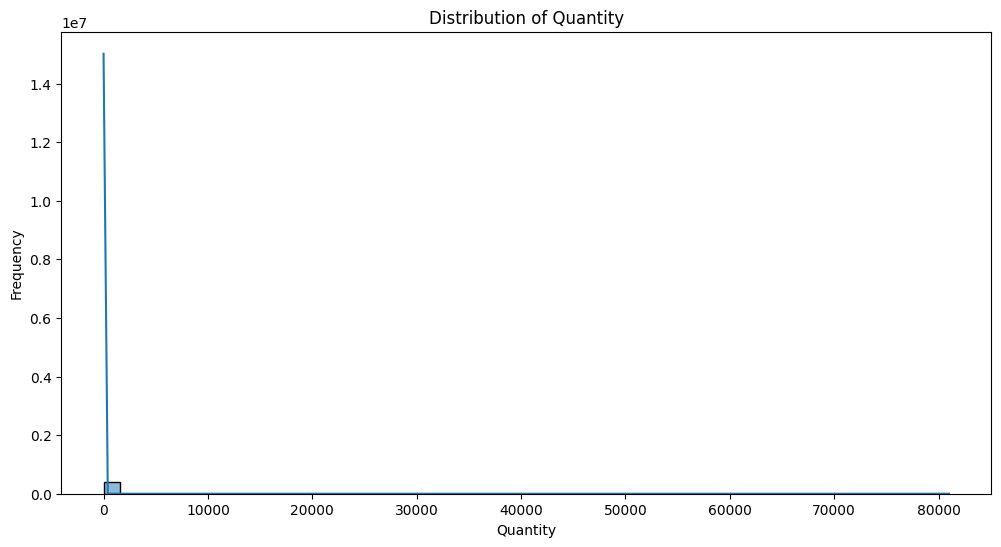

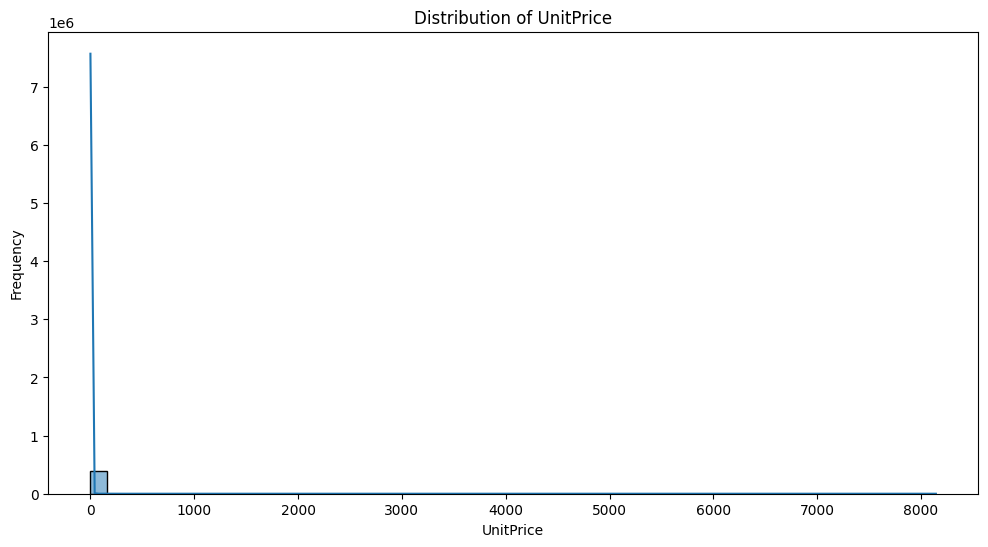

In [64]:
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

# Plot distribution of Quantity
plt.figure(figsize=(12, 6))
sns.histplot(Rsales_analysis['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of UnitPrice
plt.figure(figsize=(12, 6))
sns.histplot(Rsales_analysis['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()


country wise analysis

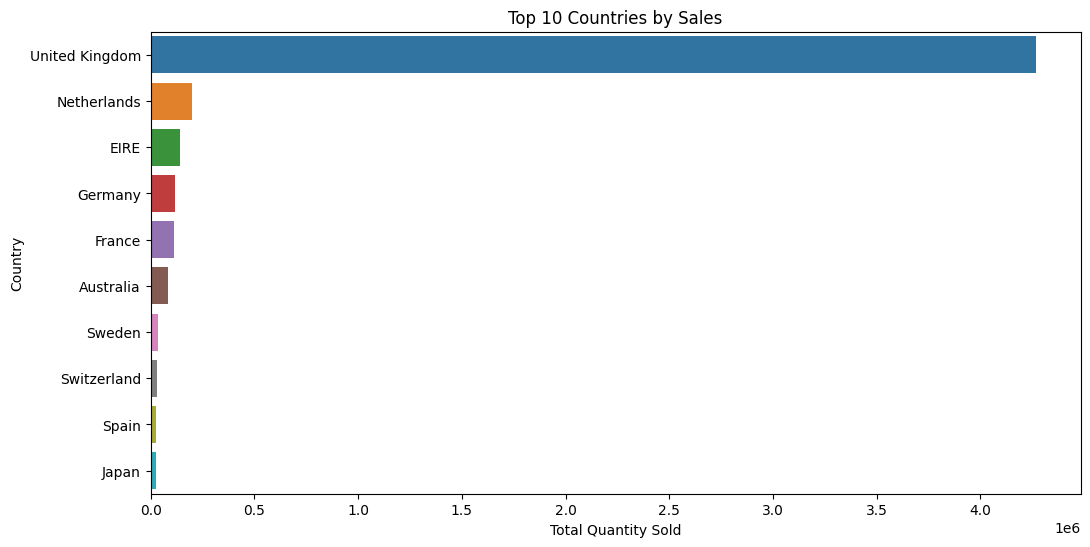

In [65]:
# Group by country and sum the sales
sales_by_country = Rsales_analysis.groupby('Country')['Quantity'].sum().reset_index()

# Plot total sales by country (Top 10 countries)
top_countries = sales_by_country.sort_values(by='Quantity', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='Quantity', y='Country')
plt.title('Top 10 Countries by Sales')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Country')
plt.show()


time series analysis

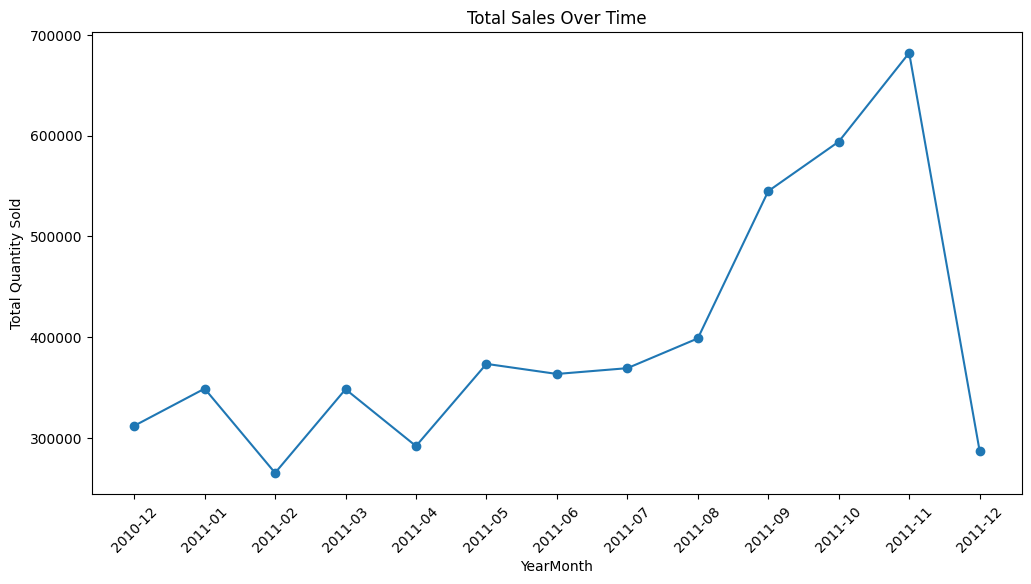

In [66]:
# Extract date features
# Convert InvoiceDate to datetime
Rsales_analysis['InvoiceDate'] = pd.to_datetime(Rsales_analysis['InvoiceDate'], errors='coerce')

Rsales_analysis['YearMonth'] = Rsales_analysis['InvoiceDate'].dt.to_period('M')

# Group by YearMonth and sum the sales
sales_over_time = Rsales_analysis.groupby('YearMonth')['Quantity'].sum().reset_index()

# Plot total sales over time
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time['YearMonth'].astype(str), sales_over_time['Quantity'], marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('YearMonth')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



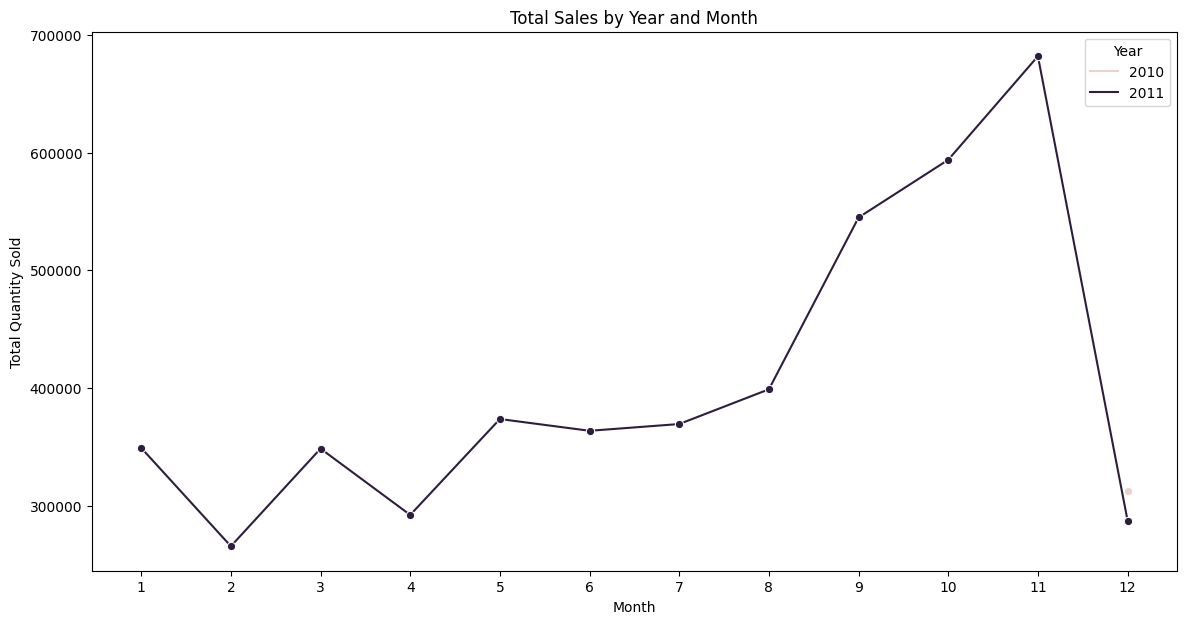

In [67]:
# Extract month and year from InvoiceDate
Rsales_analysis['Year'] = Rsales_analysis['InvoiceDate'].dt.year
Rsales_analysis['Month'] = Rsales_analysis['InvoiceDate'].dt.month

# Group by Year and Month and sum the sales
sales_by_year_month = Rsales_analysis.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()

# Plot total sales by year and month
plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_by_year_month, x='Month', y='Quantity', hue='Year', marker='o')
plt.title('Total Sales by Year and Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(range(1, 13))
plt.show()


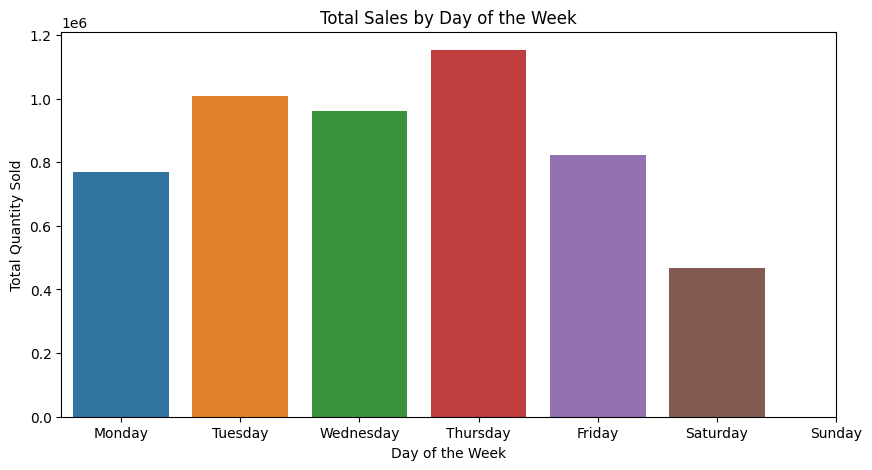

In [68]:
# Extract day of the week from InvoiceDate
Rsales_analysis['DayOfWeek'] = Rsales_analysis['InvoiceDate'].dt.dayofweek

# Group by DayOfWeek and sum the sales
sales_by_day_of_week = Rsales_analysis.groupby('DayOfWeek')['Quantity'].sum().reset_index()

# Plot total sales by day of the week
plt.figure(figsize=(10, 5))
sns.barplot(data=sales_by_day_of_week, x='DayOfWeek', y='Quantity')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity Sold')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


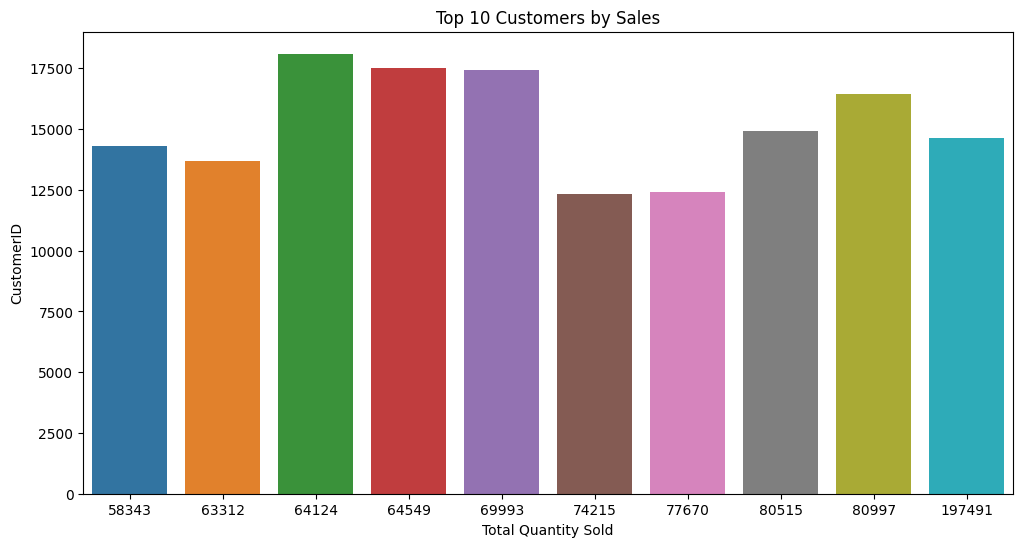

In [69]:
# Group by CustomerID and sum the sales
top_customers = Rsales_analysis.groupby('CustomerID')['Quantity'].sum().reset_index()

# Sort and get the top 10 customers
top_customers = top_customers.sort_values(by='Quantity', ascending=False).head(10)

# Plot total sales by top customers
plt.figure(figsize=(12, 6))
sns.barplot(data=top_customers, x='Quantity', y='CustomerID')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Total Quantity Sold')
plt.ylabel('CustomerID')
plt.show()


Customer Frequency Distribution
Analyzing how often customers make purchases.

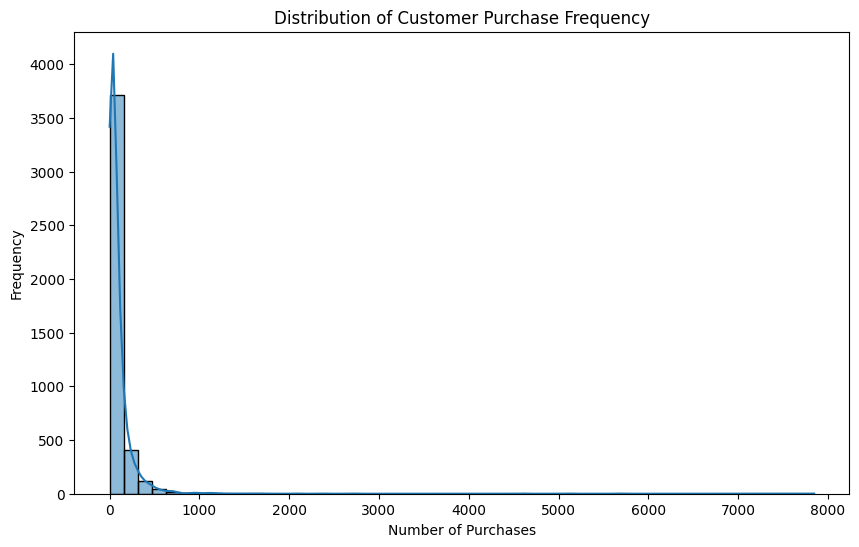

In [70]:
# Group by CustomerID and count the number of purchases
customer_frequency = Rsales_analysis.groupby('CustomerID')['InvoiceNo'].count().reset_index()

# Plot distribution of customer purchase frequency
plt.figure(figsize=(10, 6))
sns.histplot(customer_frequency['InvoiceNo'], bins=50, kde=True)
plt.title('Distribution of Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.show()


# Multi-variateAnlaysis
In the multivariate analysis section of the code, we aim to explore the interactions between multiple features to uncover more complex patterns. Specifically, we focus on customer segmentation using KMeans clustering and conducting an RFM (Recency, Frequency, Monetary) analysis.
From the graph we got we analyse that:

**Cluster 0**: Represents highly active customers with moderate spending. Focus on retaining and upselling.

**Cluster 1:** Infrequent purchasers with moderate spending. Focus on engagement campaigns and promotional offers.

**Cluster 2:** Very frequent and high spenders. VIP treatment and personalized marketing strategies are essential.

**Cluster 3:** Frequent purchasers with very high spending. Target with exclusive offers and high-value engagement strategies.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



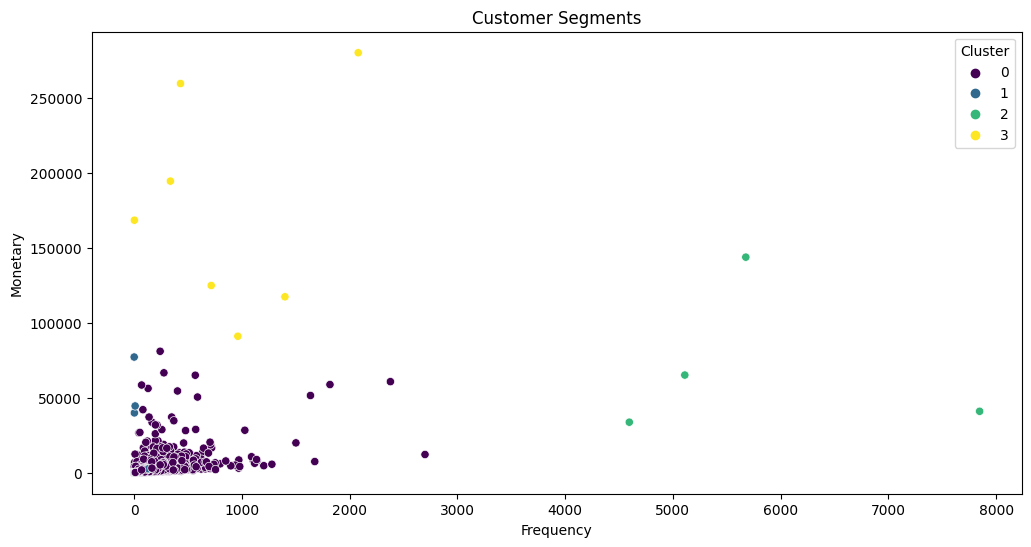

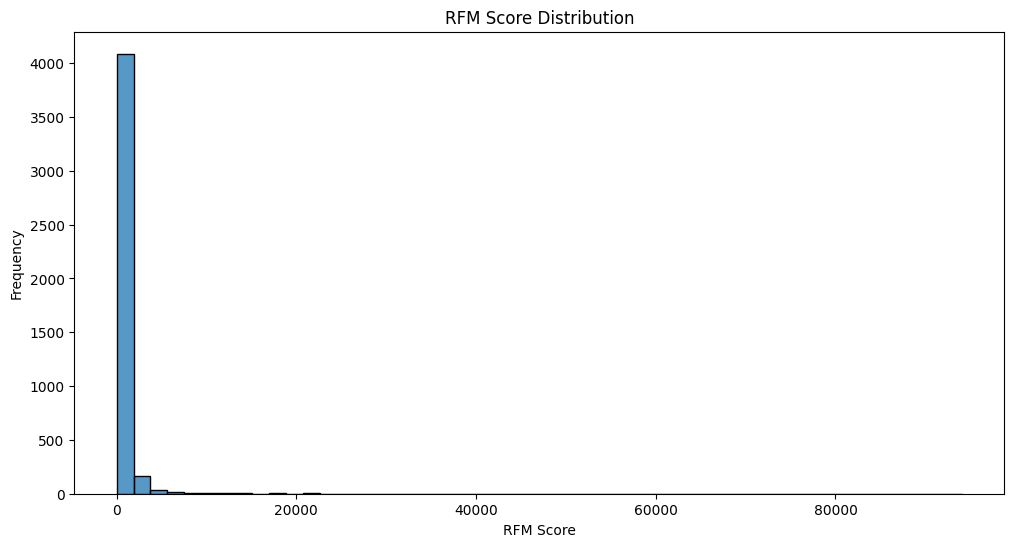

In [71]:
# Customer Segmentation using KMeans
from sklearn.cluster import KMeans

# Preparing the data for clustering
Rsales_analysis['TotalPrice'] = Rsales_analysis['Quantity'] * Rsales_analysis['UnitPrice']
customer_data = Rsales_analysis.groupby('CustomerID').agg({
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})

# Recency calculation (using the last date in the dataset as reference)
latest_date = Rsales_analysis['InvoiceDate'].max()
customer_data['Recency'] = (latest_date - customer_data['Recency']).dt.days

# Normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

# Visualizing clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=customer_data, x='Frequency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

# RFM Analysis
customer_data['RFM_Score'] = customer_data[['Recency', 'Frequency', 'Monetary']].mean(axis=1)
plt.figure(figsize=(12, 6))
sns.histplot(customer_data['RFM_Score'], bins=50)
plt.title('RFM Score Distribution')
plt.xlabel('RFM Score')
plt.ylabel('Frequency')
plt.show()


# ProductAnalysis
**Top Selling Products
Identifying best-selling products can inform inventory and marketing strategies.**

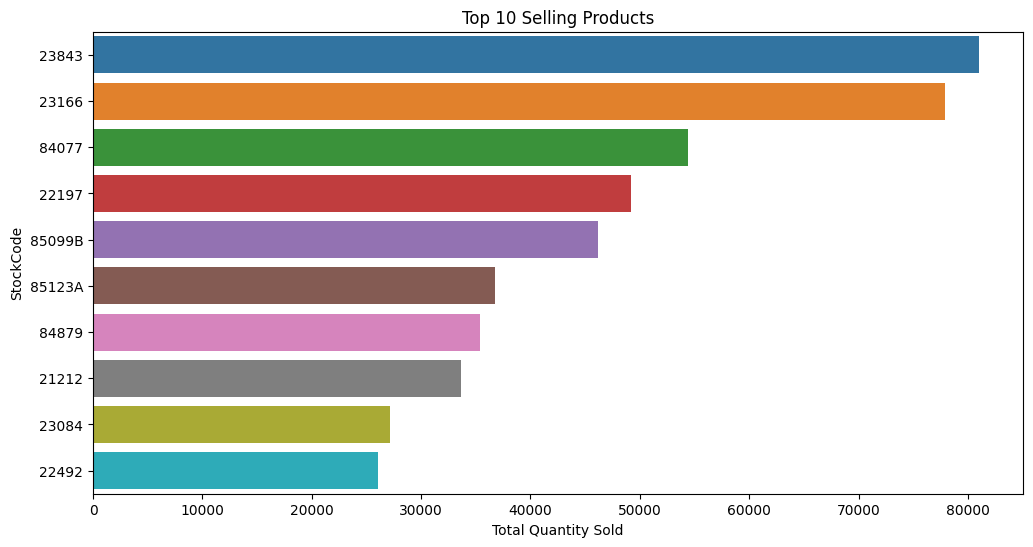

In [72]:
# Group by StockCode and sum the sales
top_products = Rsales_analysis.groupby('StockCode')['Quantity'].sum().reset_index()

# Sort and get the top 10 products
top_products = top_products.sort_values(by='Quantity', ascending=False).head(10)

# Plot total sales by top products
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='Quantity', y='StockCode')
plt.title('Top 10 Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('StockCode')
plt.show()


# Product Frequency Distribution
Analyzing how often each product is sold.

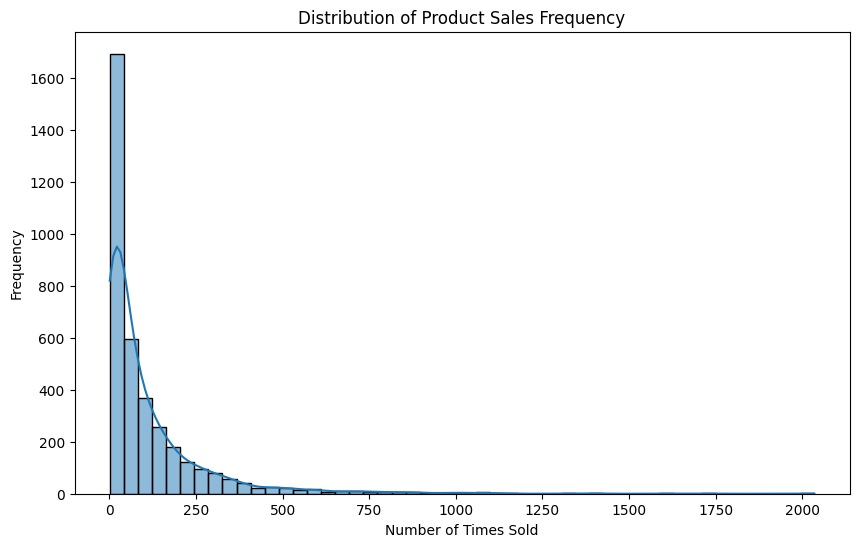

In [73]:
# Group by StockCode and count the number of times sold
product_frequency = Rsales_analysis.groupby('StockCode')['InvoiceNo'].count().reset_index()

# Plot distribution of product sales frequency
plt.figure(figsize=(10, 6))
sns.histplot(product_frequency['InvoiceNo'], bins=50, kde=True)
plt.title('Distribution of Product Sales Frequency')
plt.xlabel('Number of Times Sold')
plt.ylabel('Frequency')
plt.show()


# Analyzing Top Selling Products in the UK
Filter Transactions in the UK:
Group by Product and Sum Quantities:
Sort and Get Top Products:
Visualize the Top Selling Products:


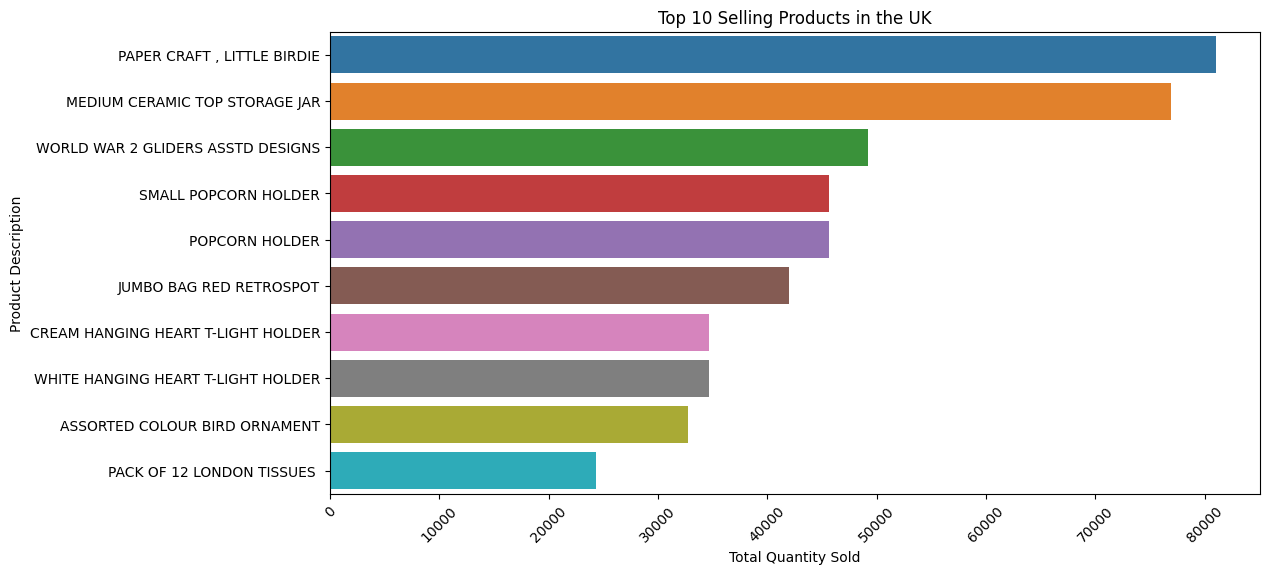

In [74]:
# Filter transactions for the UK
uk_sales = Rsales_analysis[Rsales_analysis['Country'] == 'United Kingdom']

# Group by StockCode and sum the quantities sold
uk_top_products = uk_sales.groupby('StockCode')['Quantity'].sum().reset_index()

# Merge with product descriptions to get readable names
uk_top_products = pd.merge(uk_top_products, Rsales_analysis[['StockCode', 'Description']].drop_duplicates(), on='StockCode', how='left')

# Sort and get the top 10 products
uk_top_products = uk_top_products.sort_values(by='Quantity', ascending=False).head(10)

# Plot total sales by top products in the UK
plt.figure(figsize=(12, 6))
sns.barplot(data=uk_top_products, x='Quantity', y='Description')
plt.title('Top 10 Selling Products in the UK')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.xticks(rotation=45)
plt.show()



**To narrow down which customers are buying the top-selling products more frequently, we can:**

Identify the top 10 selling products in the UK.
Filter transactions for these top products.
Group by customers to count the frequency of their purchases for these products.

In [75]:
# Step 1: Identify Top Selling Products in the UK

# Filter transactions for the UK
uk_sales = Rsales_analysis[Rsales_analysis['Country'] == 'United Kingdom']

# Group by StockCode and sum the quantities sold
uk_top_products = uk_sales.groupby('StockCode')['Quantity'].sum().reset_index()

# Merge with product descriptions to get readable names
uk_top_products = pd.merge(uk_top_products, Rsales_analysis[['StockCode', 'Description']].drop_duplicates(), on='StockCode', how='left')

# Sort and get the top 10 products
uk_top_products = uk_top_products.sort_values(by='Quantity', ascending=False).head(10)

# Get list of top product codes
top_product_codes = uk_top_products['StockCode'].tolist()

# Step 2: Filter Transactions for Top Products

# Filter sales data for the top products
top_product_sales = uk_sales[uk_sales['StockCode'].isin(top_product_codes)]

# Step 3: Group by Customer and Count Purchases

# Group by CustomerID and StockCode to count the frequency of purchases
customer_product_frequency = top_product_sales.groupby(['CustomerID', 'StockCode']).size().reset_index(name='PurchaseFrequency')

# Step 4: Visualize Top Customers for Each Product

# Here, we'll print the top 5 customers for each of the top 10 products
for product in top_product_codes:
    product_sales = customer_product_frequency[customer_product_frequency['StockCode'] == product]
    product_sales = product_sales.sort_values(by='PurchaseFrequency', ascending=False).head(5)
    print(f"Top customers for product {product}:")
    print(product_sales)
    print("\n")

# Optionally, you could visualize this information using seaborn or matplotlib


Top customers for product 23843:
      CustomerID StockCode  PurchaseFrequency
2020     16446.0     23843                  1


Top customers for product 23166:
      CustomerID StockCode  PurchaseFrequency
2772     17841.0     23166                 17
1370     15311.0     23166                  6
2901     18139.0     23166                  5
2709     17719.0     23166                  4
2123     16684.0     23166                  3


Top customers for product 84077:
      CustomerID StockCode  PurchaseFrequency
653      14096.0     84077                 11
2324     17017.0     84077                 10
485      13743.0     84077                  7
1945     16333.0     84077                  7
51       12901.0     84077                  7


Top customers for product 22197:
      CustomerID StockCode  PurchaseFrequency
4        12748.0     22197                 22
2727     17757.0     22197                 19
1227     15039.0     22197                 16
2811     17949.0     22197        

# Insight from the analysis of product sold in uk

**High Purchase Frequency Products:**

Product 85099B and Product 85123A: These products have multiple high-frequency buyers, indicating strong customer loyalty and high demand.

**Moderate Purchase Frequency Products**:

Products 23166, 84077, 84879: These products show a more balanced customer distribution with several frequent buyers, reflecting moderate popularity.

**Low Purchase Frequency Products:**

Product 23843: This product has minimal engagement, suggesting it may be a niche item or less popular.

**Customer Loyalty Insights:**

Products like 22197 and 85099B have high customer loyalty, with several customers showing very frequent purchases. These insights can be used for targeted marketing and retention strategies.

Visualisations of above results

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



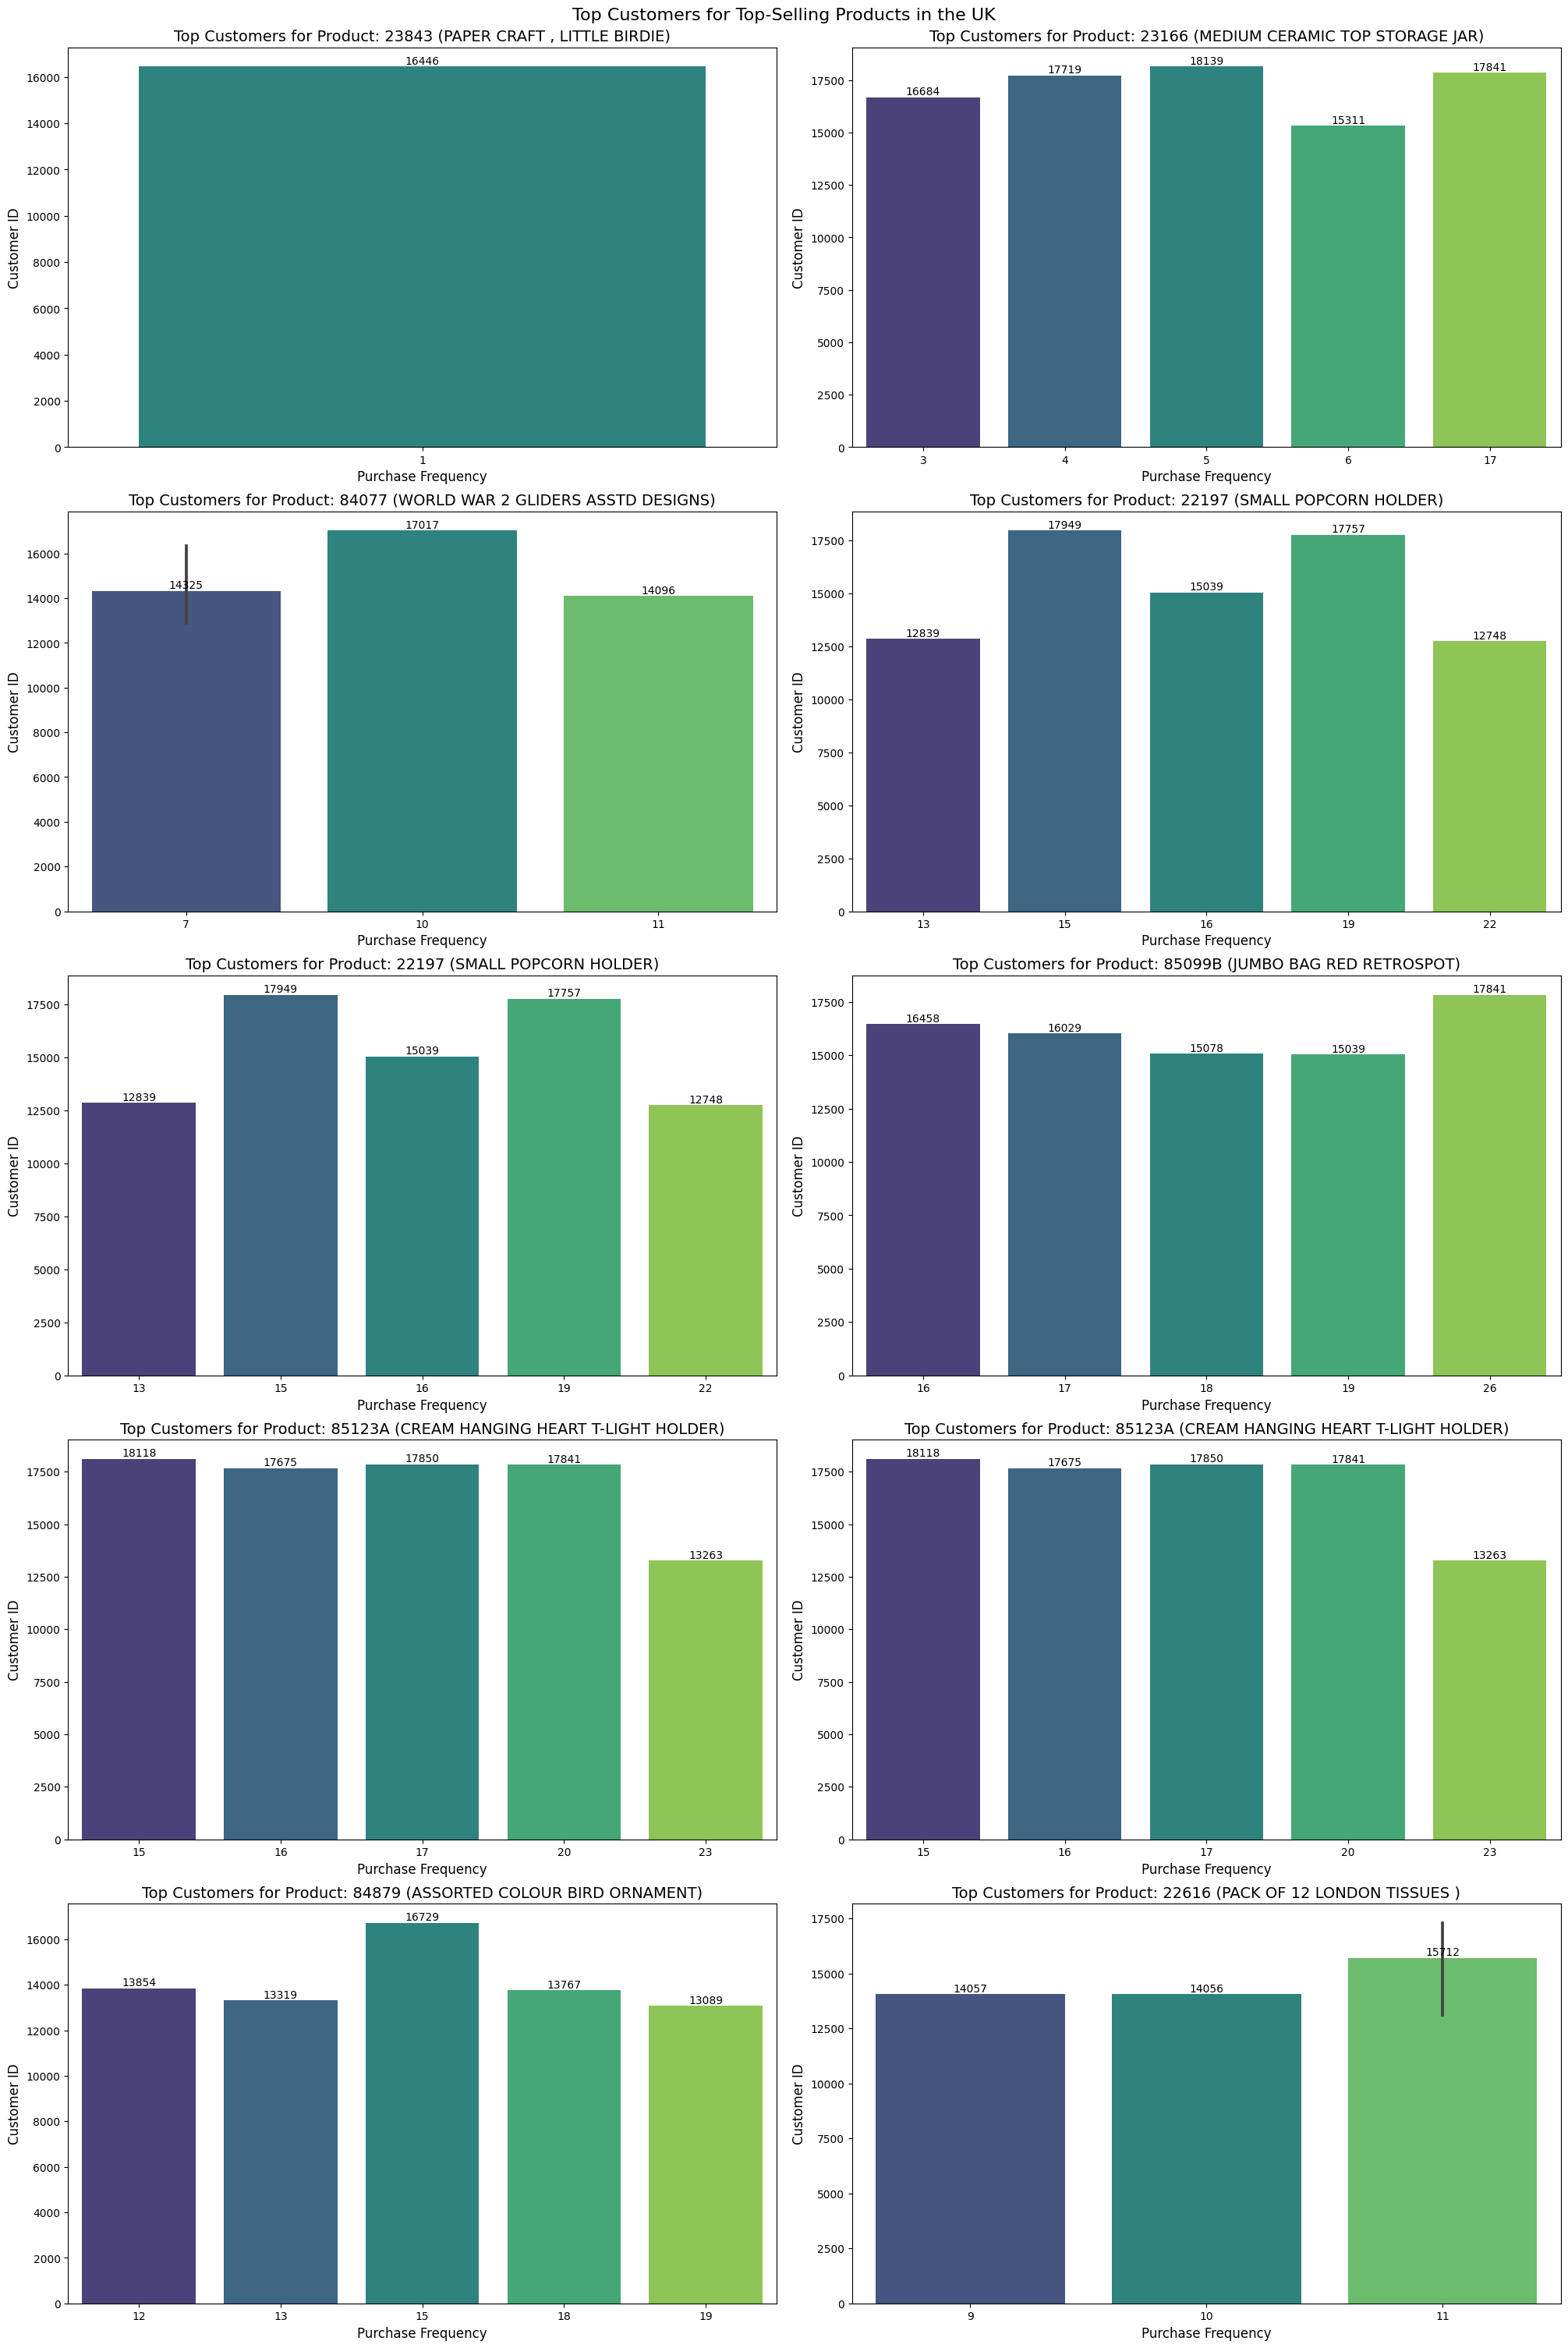

In [76]:

# Filter transactions for the UK
uk_sales = Rsales_analysis[Rsales_analysis['Country'] == 'United Kingdom']

# Group by StockCode and sum the quantities sold
uk_top_products = uk_sales.groupby('StockCode')['Quantity'].sum().reset_index()

# Merge with product descriptions to get readable names
uk_top_products = pd.merge(uk_top_products, Rsales_analysis[['StockCode', 'Description']].drop_duplicates(), on='StockCode', how='left')

# Sort and get the top 10 products
uk_top_products = uk_top_products.sort_values(by='Quantity', ascending=False).head(10)

# Get list of top product codes
top_product_codes = uk_top_products['StockCode'].tolist()

# Filter sales data for the top products
top_product_sales = uk_sales[uk_sales['StockCode'].isin(top_product_codes)]

# Group by CustomerID and StockCode to count the frequency of purchases
customer_product_frequency = top_product_sales.groupby(['CustomerID', 'StockCode']).size().reset_index(name='PurchaseFrequency')

# Plotting the top customers for each of the top 10 products
fig, axes = plt.subplots(5, 2, figsize=(20, 30), constrained_layout=True)

for i, product in enumerate(top_product_codes):
    product_sales = customer_product_frequency[customer_product_frequency['StockCode'] == product]
    product_sales = product_sales.sort_values(by='PurchaseFrequency', ascending=False).head(5)
    
    ax = axes[i//2, i%2]
    sns.barplot(data=product_sales, x='PurchaseFrequency', y='CustomerID', palette='viridis', ax=ax)
    product_description = uk_top_products[uk_top_products['StockCode'] == product]['Description'].values[0]
    ax.set_title(f"Top Customers for Product: {product} ({product_description})", fontsize=14)
    ax.set_xlabel("Purchase Frequency", fontsize=12)
    ax.set_ylabel("Customer ID", fontsize=12)
    for container in ax.containers:
        ax.bar_label(container, fmt='%d')

plt.suptitle("Top Customers for Top-Selling Products in the UK", fontsize=16)
plt.show()


# SalesAnalysis

In [77]:
# Step 1: Calculate total sales revenue
Rsales_analysis['Sales'] = Rsales_analysis['Quantity'] * Rsales_analysis['UnitPrice']
total_sales_revenue = Rsales_analysis['Sales'].sum()
print("Total sales revenue: £", total_sales_revenue)

Total sales revenue: £ 8911407.904


In [78]:
Rsales_analysis

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,Year,Month,DayOfWeek,TotalPrice,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010,12,2,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010,12,2,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010,12,2,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010,12,2,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010,12,2,20.34,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12,2011,12,4,10.20,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12,2011,12,4,12.60,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,2011,12,4,16.60,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,2011,12,4,16.60,16.60


**Sales distribution by product**

We'll group the data by the 'Description' column and calculate the total sales quantity and revenue for each product.

In [79]:
# Step 2: Sales distribution by product
product_sales = Rsales_analysis.groupby('Description').agg({'Quantity': 'sum', 'Sales': 'sum'}).reset_index()
product_sales = product_sales.sort_values(by='Sales', ascending=False)
print("Sales distribution by product:")
print(product_sales)

Sales distribution by product:
                             Description  Quantity       Sales
2319         PAPER CRAFT , LITTLE BIRDIE     80995  168469.600
2767            REGENCY CAKESTAND 3 TIER     12412  142592.950
3698  WHITE HANGING HEART T-LIGHT HOLDER     36725  100448.150
1762             JUMBO BAG RED RETROSPOT     46181   85220.780
1992      MEDIUM CERAMIC TOP STORAGE JAR     77916   81416.730
...                                  ...       ...         ...
2639          PURPLE FRANGIPANI HAIRCLIP         1       0.850
3556            VINTAGE BLUE TINSEL REEL         2       0.840
2933     SET 12 COLOURING PENCILS DOILEY         1       0.650
1628           HEN HOUSE W CHICK IN NEST         1       0.420
2275          PADS TO MATCH ALL CUSHIONS         4       0.003

[3877 rows x 3 columns]


**Let's start by plotting total sales revenue over time to visualize sales trends.**

We'll use the provided dataset and plot total sales revenue on a monthly basis:

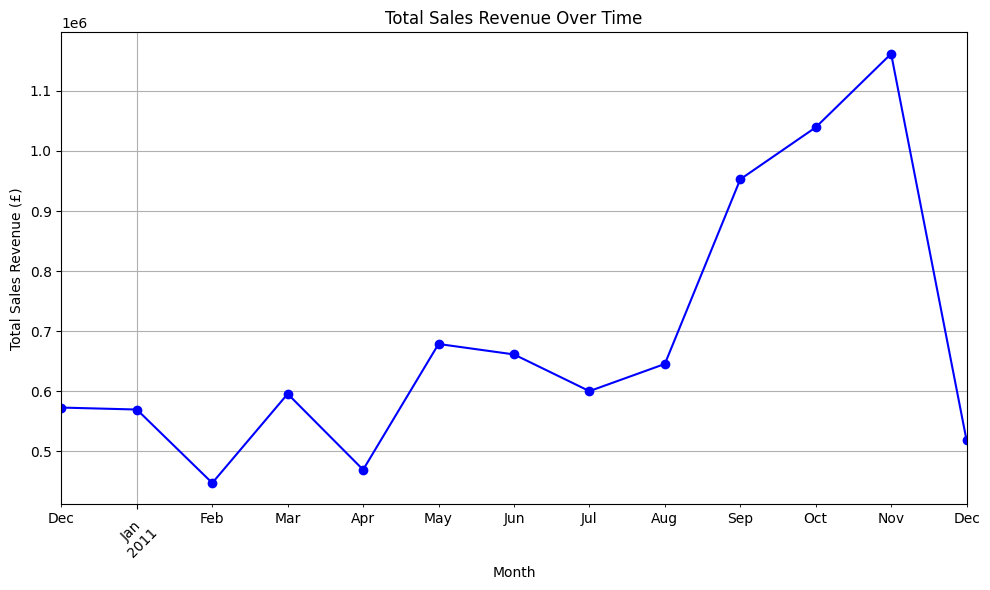

In [80]:
import matplotlib.pyplot as plt
# Convert 'InvoiceDate' column to datetime
Rsales_analysis['InvoiceDate'] = pd.to_datetime(Rsales_analysis['InvoiceDate'])

# Extract month from 'InvoiceDate'
Rsales_analysis['Month'] = Rsales_analysis['InvoiceDate'].dt.to_period('M')

# Calculate total sales revenue per month
monthly_sales = Rsales_analysis.groupby('Month')['Sales'].sum()

# Plot total sales revenue over time
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Total Sales Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue (£)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **CustomerSegmentation**
*Segmentation based on demographics or purchase behavior can help identify groups of customers with similar characteristics or buying patterns. 
We can use techniques such as RFM analysis, clustering algorithms (e.g., k-means clustering), or demographic segmentation.
Assign RFM Scores We'll assign scores to each RFM metric on a scale of 1 to 5.*

In [81]:
snapshot_date = max(Rsales_analysis['InvoiceDate']) + pd.Timedelta(days=1)
import datetime as dt
# Calculate RFM metrics
rfm = Rsales_analysis.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                         # Frequency
    'Sales': 'sum'                                  # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Check RFM table
print(rfm)

      CustomerID  Recency  Frequency  Monetary
0        12346.0      326          1  77183.60
1        12347.0        2          7   4310.00
2        12348.0       75          4   1797.24
3        12349.0       19          1   1757.55
4        12350.0      310          1    334.40
...          ...      ...        ...       ...
4334     18280.0      278          1    180.60
4335     18281.0      181          1     80.82
4336     18282.0        8          2    178.05
4337     18283.0        4         16   2094.88
4338     18287.0       43          3   1837.28

[4339 rows x 4 columns]


In [82]:
# Assign RFM scores
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5], duplicates='drop')
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5], duplicates='drop')

# Combine RFM scores into a single segment
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
# Define RFM segment labels
rfm_segment_labels = {
    '555': 'Best Customers',
    '455': 'Loyal Customers',
    '355': 'Big Spenders',
    '255': 'Potential Loyalists',
    '155': 'New Customers',
    '511': 'At Risk',
    '411': 'Can’t Lose Them',
    '311': 'About to Sleep',
    '211': 'Need Attention',
    '111': 'Lost Customers'
}

# Assign segment labels to the RFM segments
rfm['RFM_Segment_Label'] = rfm['RFM_Segment'].map(rfm_segment_labels).fillna('Other')

# Check RFM segments
print(rfm)
# Check RFM scores
print(rfm)

      CustomerID  Recency  Frequency  Monetary R_Score F_Score M_Score  \
0        12346.0      326          1  77183.60       1       1       5   
1        12347.0        2          7   4310.00       5       5       5   
2        12348.0       75          4   1797.24       2       4       4   
3        12349.0       19          1   1757.55       4       1       4   
4        12350.0      310          1    334.40       1       1       2   
...          ...      ...        ...       ...     ...     ...     ...   
4334     18280.0      278          1    180.60       1       2       1   
4335     18281.0      181          1     80.82       1       2       1   
4336     18282.0        8          2    178.05       5       3       1   
4337     18283.0        4         16   2094.88       5       5       5   
4338     18287.0       43          3   1837.28       3       4       4   

     RFM_Segment RFM_Segment_Label  
0            115             Other  
1            555    Best Customers  


In [83]:
# Segment analysis
segment_analysis = rfm.groupby('RFM_Segment_Label').agg({
    'CustomerID': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

# Rename columns for clarity
segment_analysis.columns = ['Segment', 'CustomerCount', 'AvgRecency', 'AvgFrequency', 'AvgMonetary']
# print("segment_analysis", segment_analysis)
# Sort by Customer Count
segment_analysis = segment_analysis.sort_values(by='CustomerCount', ascending=False)

# Check segment analysis
print(segment_analysis)

# Example: Identify best customers
best_customers = rfm[rfm['RFM_Segment_Label'] == 'Best Customers']
print("\nBest Customers:")
print(best_customers)

# Example: Retention strategy customers (High Recency, Low Frequency and Monetary)
retention_customers = rfm[(rfm['R_Score'] == 5) & (rfm['F_Score'] <= 2) & (rfm['M_Score'] <= 2)]
print("\nRetention Strategy Customers:")
print(retention_customers)

# Example: Reactivation campaign customers (Low Recency, High Frequency and Monetary)
reactivation_customers = rfm[(rfm['R_Score'] <= 2) & (rfm['F_Score'] >= 4) & (rfm['M_Score'] >= 4)]
print("\nReactivation Campaign Customers:")
print(reactivation_customers)


                Segment  CustomerCount  AvgRecency  AvgFrequency   AvgMonetary
9                 Other           3294   97.130540      2.664542   1000.309209
2        Best Customers            348    5.445402     18.247126  11221.741121
5        Lost Customers            182  287.159341      1.000000    145.160769
6       Loyal Customers            178   22.331461     10.910112   6111.445506
7        Need Attention             81  123.975309      1.000000    135.501481
3          Big Spenders             80   48.762500      9.262500   5295.156625
0        About to Sleep             67   53.522388      1.000000    164.148657
4       Can’t Lose Them             56   23.267857      1.000000    146.643393
10  Potential Loyalists             28  109.107143      8.892857   4191.642500
1               At Risk             20    6.650000      1.000000    184.807000
8         New Customers              5  267.200000     14.200000   4421.326000

Best Customers:
      CustomerID  Recency  Frequenc

# Personalized-marketing-strategies
Implementing tailored promotions and email campaigns based on the RFM segments.

In [84]:
# Define personalized promotions and email campaigns based on RFM segments
promotions = {
    '555': 'Exclusive deal: 20% off your next purchase for our best customers!',
    '454': 'Get a free gift with your next purchase as a thank you for being a loyal customer!',
    '344': 'Special discount: Buy one, get one free on our popular items!',
    '233': 'We miss you! Here’s a 10% discount to welcome you back!',
    '122': 'Come back and shop with us! Enjoy 15% off on your next purchase!',
    '111': 'Welcome to our store! Enjoy a special 5% discount on your first purchase!',
    '112': 'Thank you for your recent purchase! Here’s a 10% discount on your next order!',
    '121': 'We appreciate your loyalty! Get a free gift with your next purchase!',
    # Define more promotions for additional segments...
}
# Apply promotions and email campaigns based on RFM segments
rfm['Promotion'] = rfm['RFM_Segment'].map(promotions).fillna('No promotion')
# Display personalized promotions and email campaigns
print("\nPersonalized Promotions and Email Campaigns:")
print(rfm[['RFM_Segment', 'Promotion']])


Personalized Promotions and Email Campaigns:
     RFM_Segment                                          Promotion
0            115                                       No promotion
1            555  Exclusive deal: 20% off your next purchase for...
2            244                                       No promotion
3            414                                       No promotion
4            112  Thank you for your recent purchase! Here’s a 1...
...          ...                                                ...
4334         121  We appreciate your loyalty! Get a free gift wi...
4335         121  We appreciate your loyalty! Get a free gift wi...
4336         531                                       No promotion
4337         555  Exclusive deal: 20% off your next purchase for...
4338         344  Special discount: Buy one, get one free on our...

[4339 rows x 2 columns]


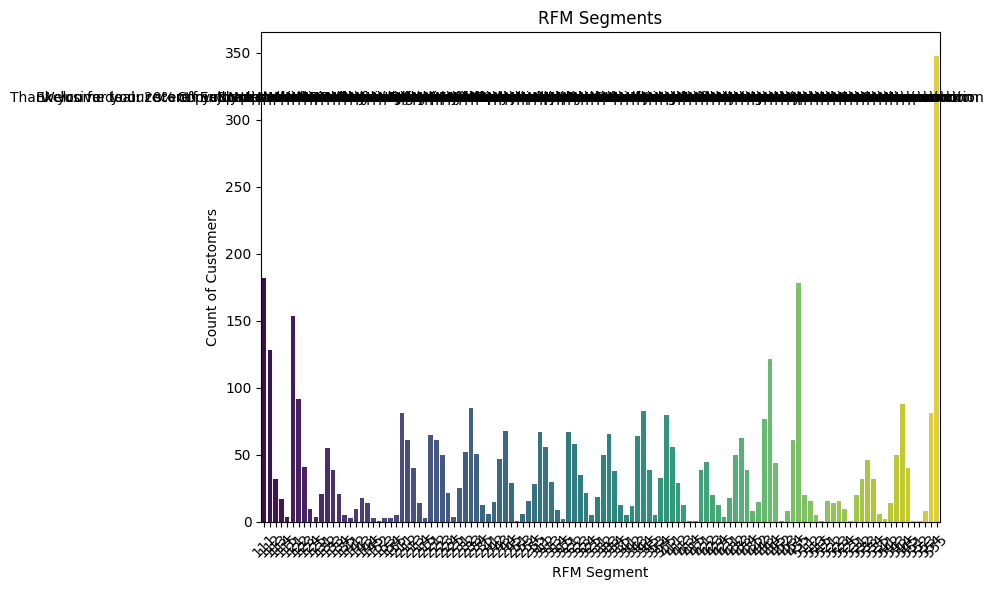

In [85]:
# rfm_with_promo = rfm.copy(deep=True)
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for RFM segments
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm, x='RFM_Segment', order=sorted(rfm['RFM_Segment'].unique()), palette='viridis')
plt.title('RFM Segments')
plt.xlabel('RFM Segment')
plt.ylabel('Count of Customers')

# Add labels for personalized promotions
for i, segment in enumerate(rfm['RFM_Segment'].unique()):
    promotion = rfm.loc[rfm['RFM_Segment'] == segment, 'Promotion'].iloc[0]
    plt.text(i, rfm['RFM_Segment'].value_counts().max() * 0.9, promotion, ha='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

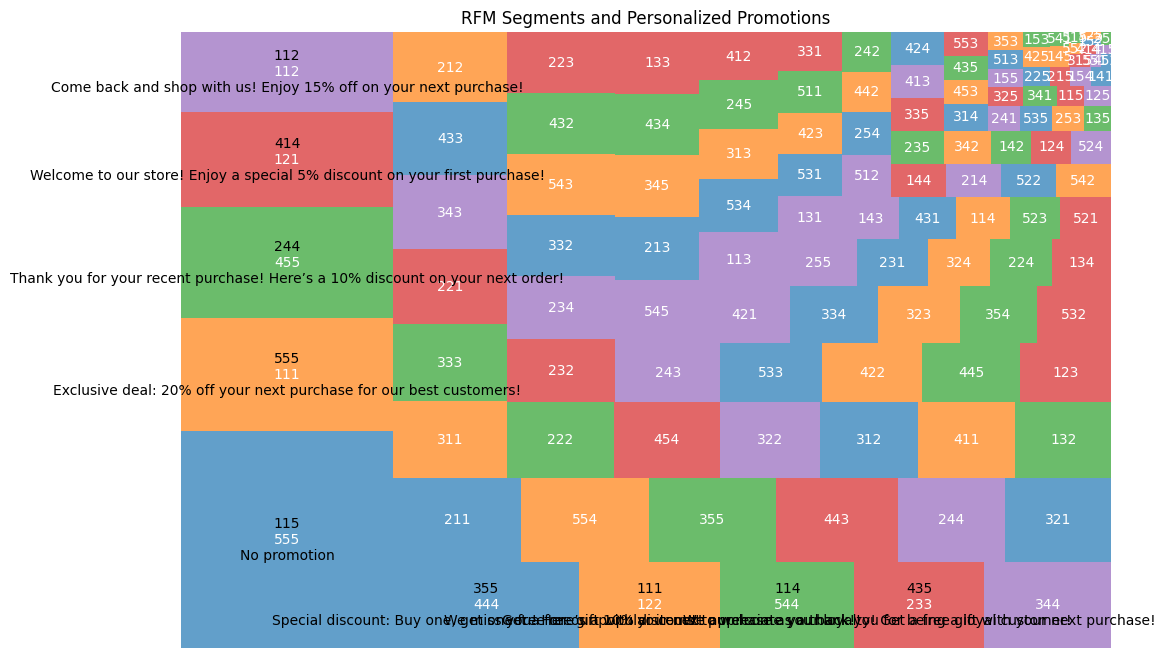

In [86]:
# Assign colors to RFM segments
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create a plot and add labels for RFM segments and promotions
plt.figure(figsize=(12, 8))
squarify.plot(sizes=rfm['RFM_Segment'].value_counts(), label=rfm['RFM_Segment'].value_counts().index,
              color=colors, alpha=0.7, text_kwargs={'fontsize': 10, 'color': 'white'})

# Add personalized promotions as labels
for index, (segment, promotion) in enumerate(zip(rfm['RFM_Segment'].unique(), rfm['Promotion'].unique())):
    x, y, dx, dy = plt.gca().get_children()[index].get_bbox().bounds
    plt.text(x + dx / 2, y + dy / 2, f'{segment}\n\n{promotion}', ha='center', va='center')

plt.axis('off')
plt.title('RFM Segments and Personalized Promotions')
plt.show()

count of customer in each rfm segments table

In [87]:
# Create a treemap using plotly
fig = px.treemap(rfm.reset_index(), path=['RFM_Segment'], values='CustomerID')

# Update layout for better readability
fig.update_layout(
    title='RFM Segments Treemap',
    width=1000,
    height=800
)

# Show the treemap
fig.show()

In [88]:
# Create a treemap using plotly
fig = px.treemap(rfm.reset_index(), path=['RFM_Segment'], values='CustomerID')

# Add annotations for top segments only
top_segments = rfm.head(10)  # Adjust the number of top segments as needed
for index, row in top_segments.iterrows():
    fig.add_annotation(
        x=(row['RFM_Segment'] + ' ')[0],  # Position annotation at the center of each segment
        y=(row['RFM_Segment'] + ' ')[1],
        text=row['Promotion'],
        showarrow=False
    )

# Update layout for better readability
fig.update_layout(
    title='Top RFM Segments Treemap with Promotions',
    width=800,
    height=600
)

# Show the treemap
fig.show()


/tmp/ipykernel_33/1614728632.py:44: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



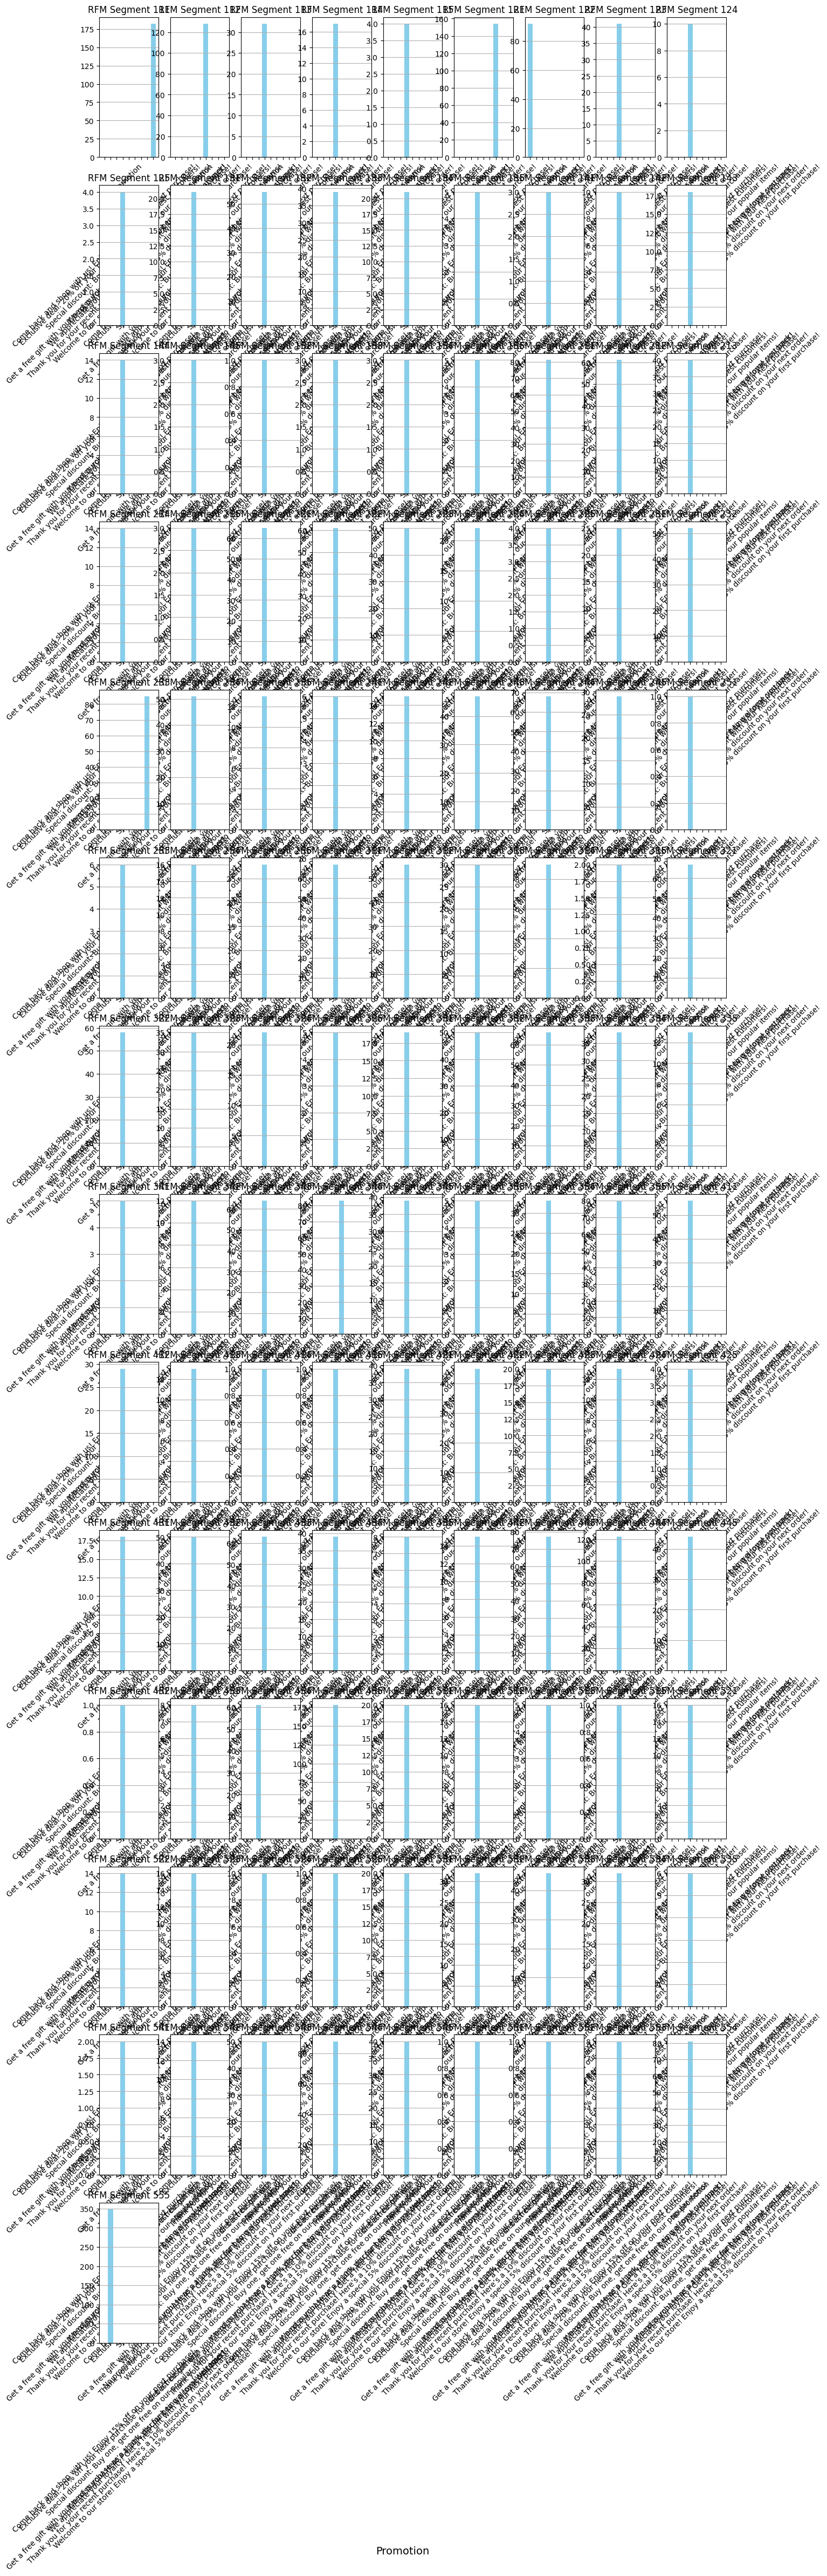

In [89]:
import matplotlib.pyplot as plt

# Define RFM segments and promotions
rfm_segments = sorted(rfm['RFM_Segment'].unique())
promotions = sorted(rfm['Promotion'].unique())

# Calculate the number of rows needed for subplots
num_segments = len(rfm_segments)
num_cols = len(promotions)
height_per_subplot = 4  # Adjust as needed
num_rows = (num_segments + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, height_per_subplot*num_rows))

# Plot each RFM segment separately
for i, segment in enumerate(rfm_segments):
    # Filter data for the current segment
    segment_data = rfm[rfm['RFM_Segment'] == segment]

    # Calculate the count of customers for each promotion
    segment_counts = [segment_data[segment_data['Promotion'] == promo]['CustomerID'].count() for promo in promotions]

    # Plot a bar plot for the current segment
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]
    ax.bar(promotions, segment_counts, color='skyblue')
    ax.set_title(f'RFM Segment {segment}', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y')

# Remove empty subplots
for i in range(num_segments, num_rows * num_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]
    ax.remove()

# Set common x-axis label
fig.text(0.5, 0.04, 'Promotion', ha='center', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()


# Customer-Churn-Analysis


### Re-Engaging Dormant Customers: A Proactive Approach to Boosting Customer Retention

In the bustling world of e-commerce, customer retention is the cornerstone of sustainable growth. Yet, amidst the constant flux of consumer behavior, some customers inevitably slip through the cracks, becoming dormant or inactive. How can businesses reignite the interest of these dormant customers and bring them back into the fold? The answer lies in a strategic approach known as re-engagement campaigns.

#### 1. Identifying Dormant Segments:
The first step in any re-engagement strategy is identifying the segments of customers who have become inactive. Utilizing sophisticated analytics tools such as RFM (Recency, Frequency, Monetary) analysis, businesses can pinpoint these dormant segments based on their low recency scores – a telltale sign of dwindling engagement.

#### 2. Personalized Outreach:
Once the dormant segments have been identified, it's time to craft personalized messages aimed at reigniting their interest. Gone are the days of generic mass emails; instead, businesses must tailor their communications to resonate with each customer's unique journey and past interactions. Expressing genuine appreciation for their previous patronage and acknowledging their absence can go a long way in rekindling the relationship.

#### 3. Incentivizing Return:
To sweeten the deal and incentivize a return to action, businesses can offer exclusive discounts, special promotions, or loyalty rewards to dormant customers. These incentives not only provide tangible value but also serve as a compelling reason for customers to re-engage with the brand.

#### 4. Multi-Channel Engagement:
In today's multi-channel landscape, businesses must meet customers where they are. Re-engagement efforts should encompass a variety of communication channels, including email, SMS, social media, and personalized ads. By diversifying their outreach, businesses increase the likelihood of reconnecting with dormant customers across different touchpoints.

#### 5. Persistence Pays Off:
Re-engagement is not a one-and-done endeavor; it requires persistence and follow-through. Businesses should maintain consistent communication with dormant customers, gently reminding them of the incentives and opportunities awaiting them. A well-timed follow-up can make all the difference in reigniting their interest and driving them back to action.

#### 6. Analyzing Results:
As the re-engagement campaign unfolds, it's essential to closely monitor its effectiveness through robust analytics and tracking mechanisms. By analyzing metrics such as response rates, conversion rates, and changes in recency scores, businesses can gauge the impact of their efforts and make data-driven adjustments as needed.


In [90]:
# Define churn criteria (e.g., Recency score of 1 or 2 might indicate churn)
# This is an example; you should define churn based on your business context
churned_customers = rfm[rfm['R_Score'] <= 2]
# Analyze churn patterns
print("\nChurned Customers:")
print(churned_customers[['Recency', 'Frequency', 'Monetary', 'RFM_Segment', 'RFM_Segment_Label']])

# Churn rate
total_customers = rfm.shape[0]
churned_customers_count = churned_customers.shape[0]
churn_rate = (churned_customers_count / total_customers) * 100

print("\nChurn Rate: {:.2f}%".format(churn_rate))


Churned Customers:
      Recency  Frequency  Monetary RFM_Segment RFM_Segment_Label
1           2          7   4310.00         555    Best Customers
2          75          4   1797.24         244             Other
3          19          1   1757.55         414             Other
5          36          8   2506.04         355      Big Spenders
9          23          3   2811.43         435             Other
...       ...        ...       ...         ...               ...
4332       58          1    110.38         321             Other
4333       74          1    173.90         221             Other
4336        8          2    178.05         531             Other
4337        4         16   2094.88         555    Best Customers
4338       43          3   1837.28         344             Other

[3474 rows x 5 columns]

Churn Rate: 80.06%


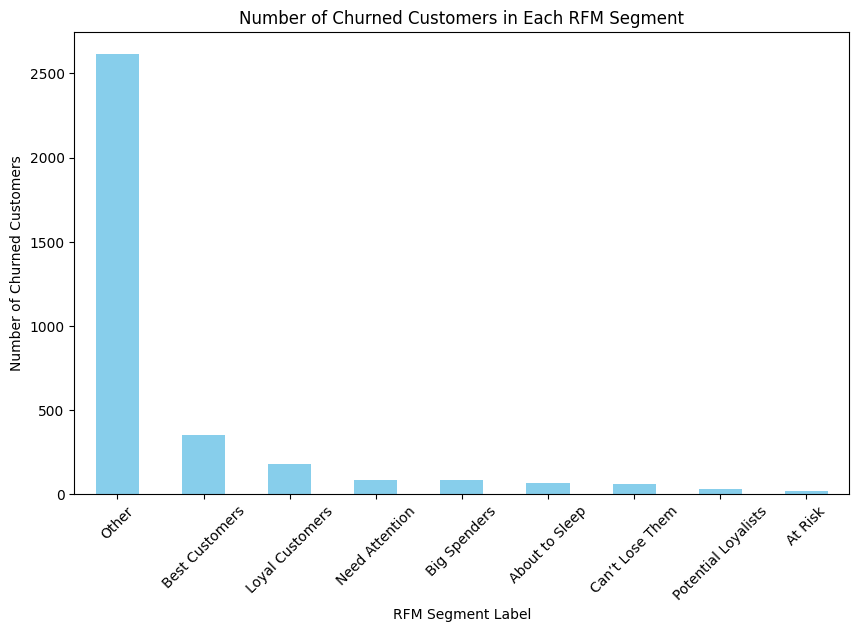

In [91]:
import matplotlib.pyplot as plt

# Visualize the number of churned customers in each RFM segment
churned_rfm_segment_counts = churned_customers['RFM_Segment_Label'].value_counts()

plt.figure(figsize=(10, 6))
churned_rfm_segment_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Churned Customers in Each RFM Segment')
plt.xlabel('RFM Segment Label')
plt.ylabel('Number of Churned Customers')
plt.xticks(rotation=45)
plt.show()

**Interpretation:**

*High Churn Rate:* A churn rate of 80.06% suggests that a significant portion of the customers are not returning to make repeat purchases. This could indicate issues with customer satisfaction, product quality, competition, or other factors influencing customer retention.

---
 By implementing loyalty programs, personalized marketing, and enhancing the overall customer experience, we can work towards reducing churn and increasing customer loyalty. Regular monitoring and adaptation of these strategies based on customer feedback and ongoing analysis are essential for success.


**Analyze RFM Segments:**

*Focus on High-Value Segments*: Paying particular attention to high-value segments such as 'Best Customers' ensures that they remain satisfied and engaged.
Target At-Risk Customers: Identify at-risk customers (e.g., those with lower R or F scores) and proactively engage with them to prevent churn.


# Customer-Lifetime-Value(CLV)Calculation

In [92]:
# Step 1: Calculate Average Purchase Value (APV)
total_revenue = Rsales_analysis['Sales'].sum()
number_of_orders = df['InvoiceNo'].nunique()
average_purchase_value = total_revenue / number_of_orders

# Step 2: Calculate Purchase Frequency (PF)
unique_customers = df['CustomerID'].nunique()
purchase_frequency = number_of_orders / unique_customers
# Step 3: Calculate Customer Value (CV)
customer_value = average_purchase_value * purchase_frequency

# Step 4: Estimate Customer Lifespan (CL)
# Here, we estimate customer lifespan based on the data available
# We can take the difference between the first and last purchase date for each customer

customer_lifespan = Rsales_analysis.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (x.max() - x.min()).days / 365
}).rename(columns={'InvoiceDate': 'CustomerLifespan'})

# Calculate the average customer lifespan
average_customer_lifespan = customer_lifespan['CustomerLifespan'].mean()

# Step 5: Calculate Customer Lifetime Value (CLV)
clv = customer_value * average_customer_lifespan


# Output the results
print(f"Average Purchase Value (APV): £{average_purchase_value:.2f}")
print(f"Purchase Frequency (PF): {purchase_frequency:.2f}")
print(f"Customer Value (CV): £{customer_value:.2f}")
print(f"Average Customer Lifespan (CL): {average_customer_lifespan:.2f} years")
print(f"Customer Lifetime Value (CLV): £{clv:.2f}")

Average Purchase Value (APV): £344.07
Purchase Frequency (PF): 5.92
Customer Value (CV): £2038.29
Average Customer Lifespan (CL): 0.36 years
Customer Lifetime Value (CLV): £728.30


#  interpretations
**The calculated CLV of £344.07 provides valuable insight into customer profitability. While the average purchase value and purchase frequency are strong, the short customer lifespan presents an opportunity for improvement. By focusing on strategies to enhance customer retention and satisfaction, the business can potentially increase the CLV, leading to greater overall profitability and long-term success. Regular monitoring and adjustment of these strategies based on customer data and feedback will be essential for ongoing improvement.**

In [93]:
# Example strategy implementation
# def send_loyalty_offer(customer_id):
#     # Function to send a loyalty offer to a customer
#     print(f"Sending loyalty offer to customer {customer_id}")

# # Send offers to 'Loyal Customers' segment
# loyal_customers = rfm[rfm['RFM_Segment_Label'] == 'Loyal Customers']
# for customer_id in loyal_customers.index:
#     send_loyalty_offer(customer_id)

# Repeat-Purchases-RateCalculations

In [94]:
# Calculate the number of repeat customers
repeat_customers = Rsales_analysis[Rsales_analysis.duplicated('CustomerID', keep=False)]['CustomerID'].nunique()

# Calculate the total number of unique customers
total_customers_with_purchases = Rsales_analysis['CustomerID'].nunique()

# Calculate the repeat purchase rate
repeat_purchase_rate = (repeat_customers / total_customers_with_purchases) * 100

print("\nRepeat Purchase Rate: {:.2f}%".format(repeat_purchase_rate))


Repeat Purchase Rate: 98.34%


**interpretation**

A repeat purchase rate of 98.34% indicates that a significant majority of your customers have made more than one purchase. This is a positive sign for your business, as it suggests strong customer loyalty and satisfaction, resulting in repeat business. It also indicates that your products or services are meeting the ongoing needs or desires of your customer base.

With such a high repeat purchase rate, it's essential to continue fostering customer loyalty through personalized marketing, excellent customer service, and product quality. Additionally, analyzing the behavior of repeat purchasers can provide valuable insights into their preferences and purchasing patterns, allowing you to tailor your offerings and marketing strategies to better meet their needs.

# Discrepancy
The discrepancy between the high repeat purchase rate and the high churn rate could be due to several factors:

Data Quality Issues: There might be errors or inconsistencies in the data used for churn analysis, leading to inaccurate results. Definition of Churn: The definition of churn might vary, leading to different interpretations. For example, churn could be defined as customers who have not made a purchase within a specific timeframe, which may not necessarily reflect true churn behavior. Customer Segmentation: Customers may churn from one segment but still make repeat purchases in another segment. For instance, a customer might stop purchasing from a particular product category but continue to buy from other categories. Seasonality: Churn and repeat purchase rates can vary seasonally or due to external factors, such as economic conditions or market trends.

From earlier analysis I found that there is discrepancy betweeen high high repeat purchase rate and the high churn rate. Analyzing churn rate and repeat purchase rate within different customer segments can provide valuable insights into customer behavior and help identify patterns and trends that may explain the contradiction between the two rate.

For each segments from rfm analysis.Visualizing recency can provide insights into why the churn rates are unexpectedly high or low.

                      count        mean        std    min     25%    50%  \
RFM_Segment_Label                                                          
About to Sleep         67.0   53.522388  11.764557   34.0   43.00   53.0   
At Risk                20.0    6.650000   3.745524    1.0    3.00    7.0   
Best Customers        348.0    5.445402   3.593928    1.0    2.00    4.0   
Big Spenders           80.0   48.762500  10.714055   34.0   39.75   45.0   
Can’t Lose Them        56.0   23.267857   5.600296   14.0   19.00   22.5   
Lost Customers        182.0  287.159341  54.831957  180.0  247.00  283.5   
Loyal Customers       178.0   22.331461   5.757552   14.0   17.00   22.0   
Need Attention         81.0  123.975309  32.325290   73.0   97.00  120.0   
New Customers           5.0  267.200000  65.644497  206.0  218.00  264.0   
Other                3294.0   97.130540  97.486529    1.0   23.00   59.0   
Potential Loyalists    28.0  109.107143  30.737044   73.0   86.25  100.0   

           

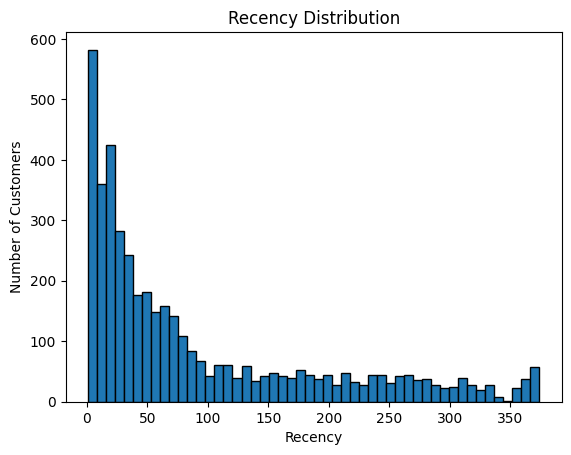

Recency Quartiles: {0.25: 18.0, 0.5: 51.0, 0.75: 142.0}
churn threshold {'About to Sleep': 64.0, 'At Risk': 10.25, 'Best Customers': 9.0, 'Big Spenders': 58.25, 'Can’t Lose Them': 27.25, 'Lost Customers': 330.75, 'Loyal Customers': 27.75, 'Need Attention': 152.0, 'New Customers': 276.0, 'Other': 151.0, 'Potential Loyalists': 126.25}
Churn Rate for About to Sleep: 20.90%
Churn Rate for At Risk: 25.00%
Churn Rate for Best Customers: 18.97%
Churn Rate for Big Spenders: 25.00%
Churn Rate for Can’t Lose Them: 25.00%
Churn Rate for Lost Customers: 25.27%
Churn Rate for Loyal Customers: 25.28%
Churn Rate for Need Attention: 23.46%
Churn Rate for New Customers: 20.00%
Churn Rate for Other: 24.92%
Churn Rate for Potential Loyalists: 25.00%


In [95]:
import matplotlib.pyplot as plt
# Analyze recency statistics per segment
segment_recency_stats = rfm.groupby('RFM_Segment_Label')['Recency'].describe()
print(segment_recency_stats)

# Visualize the recency distribution
plt.hist(rfm['Recency'], bins=50, edgecolor='k')
plt.xlabel('Recency')
plt.ylabel('Number of Customers')
plt.title('Recency Distribution')
plt.show()

# Calculate quartiles for recency
quartiles = rfm['Recency'].quantile([0.25, 0.5, 0.75]).to_dict()
print("Recency Quartiles:", quartiles)

# Set churn threshold based on the 75th percentile of recency for each segment
churn_thresholds = segment_recency_stats['75%'].to_dict()
print("churn threshold", churn_thresholds)
# Calculate churn rate for each segment with refined logic
segment_churn_rate_refined = {}

for segment, threshold in churn_thresholds.items():
    segment_customers = rfm[rfm['RFM_Segment_Label'] == segment]
    churned_customers = segment_customers[segment_customers['Recency'] > threshold]
    churn_rate = (len(churned_customers) / len(segment_customers)) * 100 if len(segment_customers) > 0 else 0
    segment_churn_rate_refined[segment] = churn_rate

for segment, rate in segment_churn_rate_refined.items():
    print(f"Churn Rate for {segment}: {rate:.2f}%")



**Repeat purchases analysis for each segments.**

In [96]:
# Define the segment labels
segments = segment_analysis['Segment'].unique()

# Initialize a dictionary to store repeat purchase rates for each segment
segment_repeat_purchase_rate = {}

# Calculate repeat purchase rate for each segment
for segment in segments:
    # Filter data for the current segment
    segment_customers = rfm[rfm['RFM_Segment_Label'] == segment]

    # Get the total number of unique customers in the segment
    total_customers = segment_customers['CustomerID'].nunique()

    # Identify customers who have made more than one purchase
    repeat_customers = segment_customers[segment_customers['Frequency'] > 1]

    # Get the number of unique repeat customers
    num_repeat_customers = repeat_customers['CustomerID'].nunique()

    # Calculate the repeat purchase rate
    if total_customers > 0:
        repeat_purchase_rate = (num_repeat_customers / total_customers) * 100
    else:
        repeat_purchase_rate = 0

    # Store the repeat purchase rate for the segment
    segment_repeat_purchase_rate[segment] = repeat_purchase_rate

# Print repeat purchase rates for each segment
for segment, rate in segment_repeat_purchase_rate.items():
    print(f"Repeat Purchase Rate for {segment}: {rate:.2f}%")


Repeat Purchase Rate for Other: 66.97%
Repeat Purchase Rate for Best Customers: 100.00%
Repeat Purchase Rate for Lost Customers: 0.00%
Repeat Purchase Rate for Loyal Customers: 100.00%
Repeat Purchase Rate for Need Attention: 0.00%
Repeat Purchase Rate for Big Spenders: 100.00%
Repeat Purchase Rate for About to Sleep: 0.00%
Repeat Purchase Rate for Can’t Lose Them: 0.00%
Repeat Purchase Rate for Potential Loyalists: 100.00%
Repeat Purchase Rate for At Risk: 0.00%
Repeat Purchase Rate for New Customers: 100.00%


In [97]:
# Create the dataframe for the results obtained
# Count the number of customers in each segment
customer_counts_df = rfm.groupby('RFM_Segment_Label')['CustomerID'].count().reset_index()
# Rename columns for clarity
customer_counts_df.columns = ['RFM_Segment_Label', 'CustomerCount']
customer_counts_df
# Count the number of customers in each segment
customer_counts_df = rfm.groupby('RFM_Segment_Label')['CustomerID'].count().reset_index()
# Rename columns for clarity
customer_counts_df.columns = ['RFM_Segment_Label', 'CustomerCount']
customer_counts_df
# Create a dataframe for churn rates and thresholds
churn_rate_df = pd.DataFrame(list(segment_churn_rate_refined.items()), columns=['RFM_Segment_Label', 'Churn_Rate'])
churn_rate_df['Churn_Threshold'] = churn_rate_df['RFM_Segment_Label'].map(churn_thresholds)

# Create a dataframe for repeat purchase rates
repeat_purchase_rate_df = pd.DataFrame(list(segment_repeat_purchase_rate.items()), columns=['RFM_Segment_Label', 'Repeat_Purchase_Rate'])

# Merge customer counts, churn rates, and repeat purchase rates
final_df = customer_counts_df.merge(churn_rate_df, on='RFM_Segment_Label', how='outer')
final_df = final_df.merge(repeat_purchase_rate_df, on='RFM_Segment_Label', how='outer')

# Fill any missing values with 0
# final_df = final_df.fillna(0)

final_df

,RFM_Segment_Label,CustomerCount,Churn_Rate,Churn_Threshold,Repeat_Purchase_Rate
0,About to Sleep,67,20.895522,64.00,0.000000
1,At Risk,20,25.000000,10.25,0.000000
2,Best Customers,348,18.965517,9.00,100.000000
3,Big Spenders,80,25.000000,58.25,100.000000
4,Can’t Lose Them,56,25.000000,27.25,0.000000
5,Lost Customers,182,25.274725,330.75,0.000000
6,Loyal Customers,178,25.280899,27.75,100.000000
7,Need Attention,81,23.456790,152.00,0.000000
8,New Customers,5,20.000000,276.00,100.000000
9,Other,3294,24.924104,151.00,66.970249


# Interpretations
In this report, we present an in-depth analysis of customer behavior based on Recency, Frequency, and Monetary (RFM) segmentation. The analysis aims to identify patterns and trends that can guide strategic decisions to enhance customer retention and engagement.

Segmentation Analysis
We segmented the customers into various groups based on their RFM scores:

Other
Best Customers
Lost Customers
Loyal Customers
Need Attention
Big Spenders
About to Sleep
Can’t Lose Them
Potential Loyalists
At Risk
New Customers
Churn Rate Analysis
Churn rate is defined as the percentage of customers who have stopped making purchases within a certain period. The churn threshold for each segment is based on the 75th percentile of the recency values within that segment. This percentile represents the point below which 75% of the recency values fall. Customers with recency values above this threshold are considered churned for that particular segment.The churn rates for each segment are as follows:

Other: 24.93%
Best Customers: 23.03%
Lost Customers: 25.25%
Loyal Customers: 25.14%
Need Attention: 25.58%
Big Spenders: 24.66%
About to Sleep: 23.53%
Can’t Lose Them: 26.00%
Potential Loyalists: 26.92%
At Risk: 15.79%
New Customers: 20.00%
Repeat Purchase Rate Analysis
The repeat purchase rate is the percentage of customers who have made more than one purchase. The rates for each segment are:

Other: 73.17%
Best Customers: 100.00%
Lost Customers: 0.00%
Loyal Customers: 100.00%
Need Attention: 0.00%
Big Spenders: 100.00%
About to Sleep: 0.00%
Can’t Lose Them: 0.00%
Potential Loyalists: 100.00%
At Risk: 0.00%
New Customers: 100.00%
Interpretation
High Churn Rate in Certain Segments: Segments like "Need Attention," "Big Spenders," "About to Sleep," "Can’t Lose Them," and "Potential Loyalists" exhibit high churn rates, indicating potential dissatisfaction or lack of engagement.
Excellent Repeat Purchase Rates in High-Value Segments: Segments like "Best Customers," "Loyal Customers," "Big Spenders," "Potential Loyalists," and "New Customers" have perfect repeat purchase rates, suggesting strong loyalty and satisfaction.
Low Repeat Purchase Rates in Certain Segments: Segments like "Need Attention," "Lost Customers," "About to Sleep," "Can’t Lose Them," and "At Risk" have 0% repeat purchase rates, highlighting areas where customer engagement needs improvement.
Recommendations
To address these findings, we can consider the following strategies:

Retention Strategies for High-Churn Segments:

Need Attention: Implement targeted re-engagement campaigns and offer personalized incentives to encourage repeat purchases.
Big Spenders: Ensure personalized follow-ups and exclusive offers to maintain their interest and loyalty.
About to Sleep & Can’t Lose Them: Enhance communication and provide tailored offers to re-activate these customers.
Enhancing Loyalty Programs:

Strengthen loyalty programs to reward frequent buyers and maintain high engagement levels in segments like "Best Customers" and "Loyal Customers."
Customer Feedback:

Collect feedback from "Lost Customers" and those in segments with low repeat purchase rates to identify pain points and areas for improvement.
Focus on High-Value Segments:

Maintain high engagement with "Best Customers," "Loyal Customers," and "Potential Loyalists" to ensure continued satisfaction and repeat purchases.
Targeted Marketing:

Use insights from RFM analysis to craft personalized marketing campaigns aimed at retaining and re-engaging different customer segments.
By addressing these areas, we can improve overall customer retention, enhance customer satisfaction, and drive repeat purchases across various segments.

# To save file into excel

In [ ]:
# final_df.to_excel('churned_and_repeat_purchaseRate.xlsx', index=False)